# Feature Reduction 2 - model accuracy

Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes the least important features and builds a model using the remaining features. It ranks the features by importance and selects the best subset of features for model building.

Here's a brief overview of how to use RFE in Python with `scikit-learn`:

1. **Import necessary libraries:**
   ```python
   from sklearn.feature_selection import RFE
   from sklearn.linear_model import LogisticRegression
   ```

2. **Create the model and RFE object:**
   ```python
   model = LogisticRegression()
   rfe = RFE(model, n_features_to_select=5)
   ```

3. **Fit the RFE object to the data:**
   ```python
   rfe = rfe.fit(X, y)
   ```

4. **Use `rfe.support_` to get a boolean mask of the selected features:**
   ```python
   selected_features = rfe.support_
   ```

5. **Use `rfe.ranking_` to get the ranking of all features:**
   ```python
   feature_ranking = rfe.ranking_
   ```

### Example Code


In [1]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Generate a dataset
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Create a model
model = LogisticRegression()

# Create the RFE object
rfe = RFE(model, n_features_to_select=5)

# Fit the RFE object to the data
rfe = rfe.fit(X, y)

# Get the boolean mask of selected features
selected_features = rfe.support_

# Get the ranking of all features
feature_ranking = rfe.ranking_

print("Selected Features:", selected_features)
print("Feature Ranking:", feature_ranking)

Selected Features: [ True  True  True  True False False  True False False False]
Feature Ranking: [1 1 1 1 3 4 1 5 2 6]




- `rfe.support_`: A boolean array indicating which features are selected.
- `rfe.ranking_`: An array of feature rankings, where 1 indicates the most important features.

In [2]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Generate a dataset
X, y = make_classification(n_samples=100, n_features=10, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])

# Create a model
model = LogisticRegression()

# Create the RFE object
rfe = RFE(model, n_features_to_select=5)

# Fit the RFE object to the data
rfe = rfe.fit(X, y)

# Get the ranking of all features
feature_ranking = rfe.ranking_

# Create a dictionary mapping feature names to their rankings
feature_ranking_dict = dict(zip(X.columns, feature_ranking))

print("Feature Ranking:", feature_ranking_dict)

Feature Ranking: {'feature_0': 1, 'feature_1': 1, 'feature_2': 1, 'feature_3': 1, 'feature_4': 3, 'feature_5': 4, 'feature_6': 1, 'feature_7': 5, 'feature_8': 2, 'feature_9': 6}


## Diabetes classifier

Using Pima Indians dataset to predict diabetes using logistic regression.

In [3]:
import pandas as pd

# import PimaIndians.csv
pima = pd.read_csv('PimaIndians.csv')


In [4]:
print(pima.head())

   pregnant  glucose  diastolic  triceps  insulin   bmi  family  age      test
0         1       89         66       23       94  28.1   0.167   21  negative
1         0      137         40       35      168  43.1   2.288   33  positive
2         3       78         50       32       88  31.0   0.248   26  positive
3         2      197         70       45      543  30.5   0.158   53  positive
4         1      189         60       23      846  30.1   0.398   59  positive


In [8]:
# create train, test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = pima.drop('test', axis=1)
y = pima['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# fit scaler and transform training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# fit model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# scale test data and make predictions
X_test_scaled = scaler.transform(X_test)

# predict
y_pred = lr.predict(X_test_scaled)

#  accuracy metrics and feature coefficients
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

77.2% accuracy on test set.
{'pregnant': 0.36, 'glucose': 1.12, 'diastolic': 0.13, 'triceps': 0.23, 'insulin': 0.13, 'bmi': 0.32, 'family': 0.4, 'age': 0.2}


Can the model be improved by reducing the number of features without hurting the model accuracy?

In [10]:
# Remove the feature with the lowest model coefficient
X = pima[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.23, 'diastolic': 0.03, 'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.38, 'family': 0.35, 'age': 0.34}


Remove diastolic.

In [12]:
# Remove the feature with the lowest model coefficient
X = pima[[ 'pregnant','glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


Remove two more features - pregnant, insulin

In [13]:
# Remove the feature with the lowest model coefficient
X = pima[['glucose', 'triceps',  'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


Keep only highest coef feature - glucose

In [14]:
# Remove the feature with the lowest model coefficient
X = pima[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


Automatic Recursive feature elimination

In [ ]:
# Remove the feature with the lowest model coefficient
X = pima[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# scale train, test data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train_scaled, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test_scaled))
print(f"{acc:.1%} accuracy on test set.") 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 5, 'glucose': 1, 'diastolic': 6, 'triceps': 3, 'insulin': 4, 'bmi': 1, 'family': 2, 'age': 1}
Index(['glucose', 'bmi', 'age'], dtype='object')
80.6% accuracy on test set.


## Tree based feature selection

In [1]:
import pandas as pd

# Load the data
ansur_f = pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_m = pd.read_csv('ANSUR_II_MALE.csv')

# print shapes
print(ansur_f.shape)
print(ansur_m.shape)

# combine datasets
ansur_df = pd.concat([ansur_f, ansur_m])
print(ansur_df.shape)

(1986, 99)
(4082, 99)
(6068, 99)


Predicting 'Gender' in ANSUR

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# scale numeric features
scaler = StandardScaler()
numeric = ansur_df.select_dtypes(include=['float64', 'int64'])
ansur_scaled = scaler.fit_transform(numeric)

# create a DataFrame
ansur_scaled_df = pd.DataFrame(ansur_scaled, columns=numeric.columns)

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(ansur_scaled, ansur_df['Gender'], test_size=0.3, random_state=0)

# create a random forest classifier
rf = RandomForestClassifier(random_state=0)

# fit the classifier
rf.fit(X_train, y_train)

# print the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc))
                                                    

99.0% accuracy on test set.


99% accuracy on test set suggests that overfitting to the training set was avoided using RF.

In [ ]:
# print the feature importances
print(dict(zip(numeric.columns, rf.feature_importances_.round(2))))


{'abdominalextensiondepthsitting': 0.0, 'acromialheight': 0.0, 'acromionradialelength': 0.0, 'anklecircumference': 0.0, 'axillaheight': 0.0, 'balloffootcircumference': 0.0, 'balloffootlength': 0.01, 'biacromialbreadth': 0.07, 'bicepscircumferenceflexed': 0.01, 'bicristalbreadth': 0.01, 'bideltoidbreadth': 0.02, 'bimalleolarbreadth': 0.01, 'bitragionchinarc': 0.0, 'bitragionsubmandibulararc': 0.0, 'bizygomaticbreadth': 0.0, 'buttockcircumference': 0.02, 'buttockdepth': 0.0, 'buttockheight': 0.0, 'buttockkneelength': 0.0, 'buttockpopliteallength': 0.0, 'calfcircumference': 0.0, 'cervicaleheight': 0.02, 'chestbreadth': 0.0, 'chestcircumference': 0.0, 'chestdepth': 0.01, 'chestheight': 0.06, 'crotchheight': 0.0, 'crotchlengthomphalion': 0.01, 'crotchlengthposterioromphalion': 0.0, 'earbreadth': 0.0, 'earlength': 0.0, 'earprotrusion': 0.0, 'elbowrestheight': 0.0, 'eyeheightsitting': 0.0, 'footbreadthhorizontal': 0.0, 'footlength': 0.01, 'forearmcenterofgriplength': 0.0, 'forearmcircumferenc

In [ ]:
# print the feature importance values
print(rf.feature_importances_)

# always sum to 1
print(rf.feature_importances_.sum())

In [13]:
# create mask
mask = rf.feature_importances_ > 0.1
print(mask)

# features that are selected
print(ansur_scaled_df.columns[mask])

# reduce the feature set of the dataset
ansur_reduced = ansur_scaled_df.loc[:, mask]
print(ansur_reduced.head())

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
Index(['neckcircumference'], dtype='object')
   neckcircumference
0          -1.016954
1          -1.846788
2          -1.268419
3          -0.463731
4          -0.891221


RFE with random forests

In [17]:
from sklearn.feature_selection import RFE

# create the RFE with a random forest estimator
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6, verbose=1)

# convert X_train to pandas df
X_train = pd.DataFrame(X_train, columns=numeric.columns)


# fit the eliminator
rfe.fit(X_train, y_train)

print(dict(zip(numeric.columns, rfe.ranking_)))
      
print(accuracy_score(y_test, rfe.predict(X_test)))

print(X_train.columns[rfe.support_])

Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 fe

c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


To speed up the process, we can pass the 'step' parameter.  The above took 3m20s.

The step process drops that number of least important features on each iteration.

In [16]:
from sklearn.feature_selection import RFE

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=numeric.columns)

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6, step=10, verbose=1)

rfe.fit(X_train_df, y_train)

print(X_train_df.columns[rfe.support_])    


Fitting estimator with 94 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.
Fitting estimator with 14 features.
Index(['biacromialbreadth', 'handcircumference', 'neckcircumference',
       'neckcircumferencebase', 'shouldercircumference', 'wristcircumference'],
      dtype='object')


Random Forest on Pima Indian dataset.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# import PimaIndians.csv
pima = pd.read_csv('PimaIndians.csv')

# create train, test data
X = pima.drop('test', axis=1)
y = pima['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# fit random forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# accuracy on test set
acc = accuracy_score(y_test, rf.predict(X_test))

# print importance per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# print accuracy
print(f"{acc:.1%} accuracy on test set.")



{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


Glucose is the most important feature in the dataset  - 0.25.

In [19]:
# create mask for features with importance > 0.15
mask = rf.feature_importances_ > 0.15

# print mask
print(mask)

# apply mask to X
X_reduced = X.loc[:, mask]

# print selected features
print(X_reduced.columns)

[False  True False False False False False False]
Index(['glucose'], dtype='object')


Wrappng Recursive Feature Eliminator (RFE) around a random forest model to remove features step by step.

This is more conservative compared to selecting features fter applying a single importance threshold.

In [20]:
# check if X, X_train, y_train exist and are DataFrames
print(isinstance(X, pd.DataFrame))
print(isinstance(X_train, pd.DataFrame))
print(isinstance(y_train, pd.Series))


True
True
True


In [21]:
# wrap feature eliminator around rf model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=1, verbose=1)

# fit the eliminator to the training data
rfe.fit(X_train, y_train)

# create a mask using support_
mask = rfe.support_

# apply the mask to the feature dataset X
X_reduced = X.loc[:, mask]
print(X_reduced.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'insulin'], dtype='object')


In [22]:
# set feature eliminator to select 2 features per step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# fit the eliminator to the training data
rfe.fit(X_train, y_train)

# create a mask using support_
mask = rfe.support_

# apply the mask to the feature dataset X
X_reduced = X.loc[:, mask]
print(X_reduced.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin'], dtype='object')


### Regularised linear regression

Instead of classification - look at regression models and feature selection. 



In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# Create and fit the model
model = LinearRegression().fit(X, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1. 2.]
Intercept: 3.0000000000000018


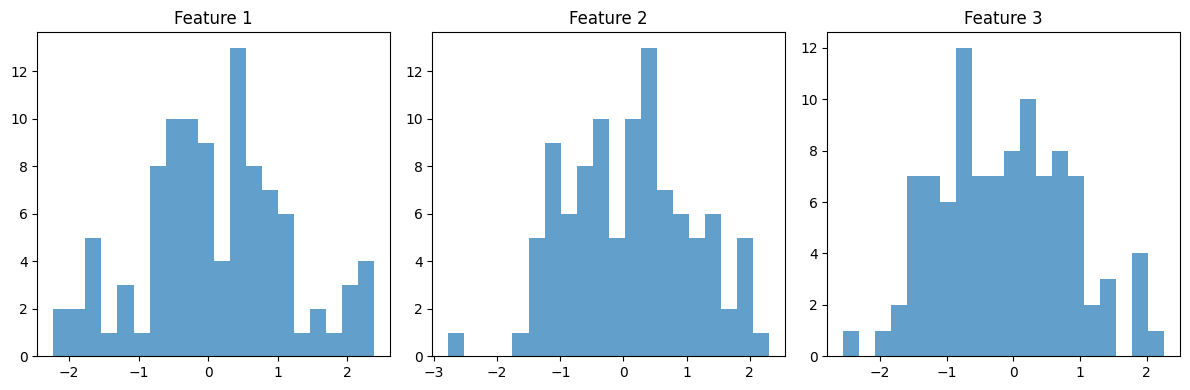

Coefficients: [ 1.9579429 -1.0505965  0.5414443]
Intercept: 2.8179536115176163
R^2 Score: 0.8739067277368449


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate random normally distributed data
np.random.seed(0)
X = np.random.randn(100, 3)
y = 3 + 2*X[:, 0] + -1*X[:, 1] + 0.5*X[:, 2] + np.random.randn(100)

# Visualize the features
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(X[:, i], bins=20, alpha=0.7)
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

# Create and fit the model
model = LinearRegression().fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Show how lr.score works
score = model.score(X, y)
print("R^2 Score:", score)

1. Coeffs -> close to [2, -1, 0.5] which is what was used to generate
2. Intercept -> closeto 3 becuase 3 was added when generating y
3. R^2 score - close to 1, indicating a good fit as generated a linear relationship

### Regularised linear regression

Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty to the model's complexity. The two most common types of regularization are L1 (Lasso) and L2 (Ridge) regularization.

### L1 Regularization (Lasso)
- Adds a penalty equal to the absolute value of the magnitude of coefficients.
- Can shrink some coefficients to zero, effectively performing feature selection.

### L2 Regularization (Ridge)
- Adds a penalty equal to the square of the magnitude of coefficients.
- Tends to shrink coefficients evenly, but does not set any to zero.

### Elastic Net
- Combines both L1 and L2 regularization.

### Mathematical Formulation
For a linear regression model:
\[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n \]

The regularized cost function for Lasso and Ridge are:
- **Lasso**: \( \text{Cost} = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} |\beta_j| \)
- **Ridge**: \( \text{Cost} = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} \beta_j^2 \)

Where \( \lambda \) is the regularization parameter that controls the strength of the penalty.

### Visualization Example
Let's demonstrate how regularization works with plots.



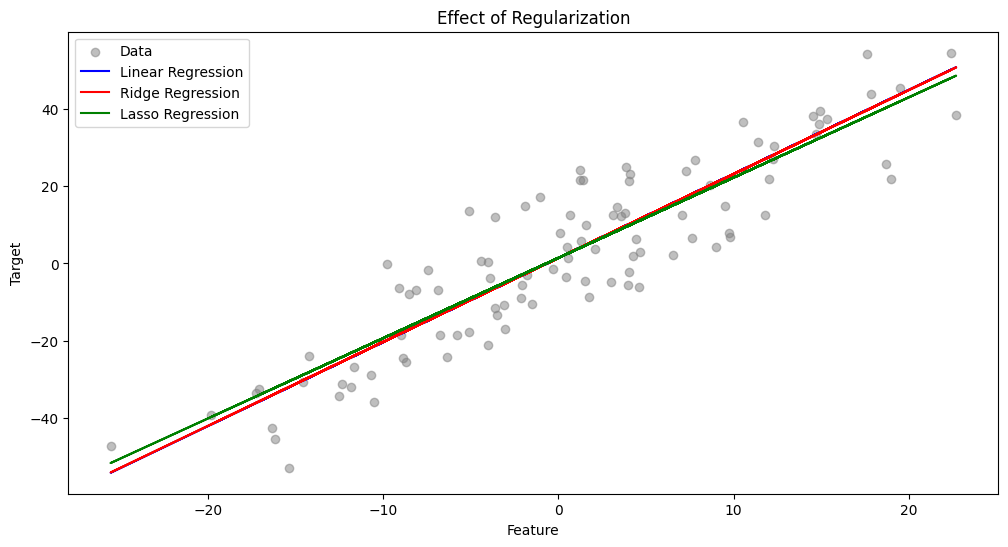

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 10

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit models with higher regularization strength
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=10.0).fit(X_train, y_train)
lasso = Lasso(alpha=10.0).fit(X_train, y_train)

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
plt.plot(X, lr.predict(X), label='Linear Regression', color='blue')
plt.plot(X, ridge.predict(X), label='Ridge Regression', color='red')
plt.plot(X, lasso.predict(X), label='Lasso Regression', color='green')
plt.legend()
plt.title('Effect of Regularization')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()



### Explanation of the Plot
- **Linear Regression**: Fits the data without any regularization, which can lead to overfitting if the model is too complex.
- **Ridge Regression**: Adds a penalty to the coefficients, which can help to reduce overfitting by shrinking the coefficients.
- **Lasso Regression**: Adds a penalty to the absolute values of the coefficients, which can shrink some coefficients to zero, effectively performing feature selection.

### Balancing the Model
- **Without Regularization**: The model may fit the training data very well but perform poorly on unseen data (overfitting).
- **With Regularization**: The model is penalized for having large coefficients, which can help to generalize better to unseen data by reducing overfitting.

By adjusting the regularization parameter \( \lambda \), you can control the trade-off between fitting the training data well and keeping the model simple to generalize better.

Working on Ansur dataset to predict BMI

In [28]:
# print ansur_df columns
print(ansur_df.columns)

Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'fun

In [38]:
# x and y
X = ansur_df.drop(['BMI'], axis=1)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ansur_df['BMI'], test_size=0.3, random_state=0)

# drop non-numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])



# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create lasso model
lasso = Lasso()

# fit to training data
lasso.fit(X_train_scaled, y_train)



Lasso()

In [39]:
# calculate the R^2 score
r2 = lasso.score(X_test_scaled, y_test)
print(f"The model can predict the test set {r2:.1%} of the variance in the BMI value")

# creatae a list of true values when coeffs = 0
zero_coef = lasso.coef_ == 0

# how many features have a zero coefficient
n_ignored = sum(zero_coef)
print(f"The model has ignored {n_ignored} out of {len(lasso.coef_)} features.")

The model can predict the test set 83.9% of the variance in the BMI value
The model has ignored 83 out of 93 features.


In [40]:
# find highest alpha value with R^2 > 0.98
alphas = [1, 0.5, 0.1, 0.01]
best_alpha = None
best_r2 = 0

for alpha in alphas:
	lasso = Lasso(alpha=alpha, random_state=0)
	lasso.fit(X_train_scaled, y_train)
	r2 = lasso.score(X_test_scaled, y_test)
	if r2 > 0.98:
		best_alpha = alpha
		best_r2 = r2

if best_alpha is not None:
	lasso = Lasso(alpha=best_alpha, random_state=0)
	lasso.fit(X_train_scaled, y_train)
	n_ignored = sum(lasso.coef_ == 0)
	# print performance stats
	print(f"The model can predict the test set {best_r2:.1%} of the variance in the BMI value")
	print(f"The model has ignored {n_ignored} out of {len(lasso.coef_)} features.")
	print(f"The best alpha value found is: {best_alpha}")
else:
	print("No alpha value found with R^2 > 0.98")




The model can predict the test set 99.3% of the variance in the BMI value
The model has ignored 50 out of 93 features.
The best alpha value found is: 0.01


In [41]:
# print feature which has been selected
print(X_train.columns[lasso.coef_ != 0])

Index(['abdominalextensiondepthsitting', 'anklecircumference',
       'balloffootlength', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bitragionchinarc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockpopliteallength',
       'calfcircumference', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'forearmcircumferenceflexed', 'forearmforearmbreadth', 'headbreadth',
       'headcircumference', 'headlength', 'heelbreadth', 'interscyei',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'shouldercircumference', 'sittingheight', 'sleevelengthspinewrist',
       'thighcircumference', 'thighclearance', 'tibialheight', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'wristcircumference', 'weight_kg',
       'stature_m'],
      dtype='object')

### Combining feature selectors

LassoCV

In [42]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=20, random_state=0)

# LassoCV for feature selection
lasso = LassoCV().fit(X, y)
lasso_mask = lasso.coef_ != 0

# RandomForest for feature selection
rf = RandomForestClassifier().fit(X, y)
rf_rfe = RFE(estimator=rf, n_features_to_select=10, step=1).fit(X, y)
rf_mask = rf_rfe.support_

# GradientBoosting for feature selection
gb = GradientBoostingClassifier().fit(X, y)
gb_rfe = RFE(estimator=gb, n_features_to_select=10, step=1).fit(X, y)
gb_mask = gb_rfe.support_

# Combine masks using a voting system
combined_mask = lasso_mask.astype(int) + rf_mask.astype(int) + gb_mask.astype(int)
voting_mask = combined_mask >= 2  # Select features chosen by at least 2 selectors

# Apply the voting mask to the feature dataset X
X_reduced = X[:, voting_mask]

print("Selected features:", np.where(voting_mask)[0])
print("Reduced feature set shape:", X_reduced.shape)

Selected features: [ 0  1  3  4  5  6 17 19]
Reduced feature set shape: (100, 8)


Ansur dataset- predicting bicep circumference

In [43]:
print(ansur_df.columns)

Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'fun

In [45]:
# create train and test sets to predict 'bicepscircumferenceflexed'
X = ansur_df.drop(['bicepscircumferenceflexed'], axis=1)
y = ansur_df['bicepscircumferenceflexed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# drop non-numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create lassocv model
lasso = LassoCV()
lasso.fit(X_train_scaled, y_train)
print(f"The model has selected {sum(lasso.coef_ != 0)} features")

# calculate r^2 score on test set
r2 = lasso.score(X_test_scaled, y_test)

# create mask for coefs not equal to 0
lasso_mask = lasso.coef_ != 0
print(f"{sum(lasso_mask)} features out of {len(lasso_mask)} selected")

The model has selected 69 features
69 features out of 93 selected


c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.986e+04, tolerance: 7.157e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

# select 10 features with RFE on a GradientBoosting model, drop 3 on each step
rfe_gb = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=10, step=10, verbose=1)
rfe_gb.fit(X_train_scaled, y_train)

In [ ]:
# calculate the R^2 on the test set
r2 = rfe_gb.score(X_test_scaled, y_test)
print(f"{r2:.1%} R^2 on the test set.")

In [ ]:
# assign support array to gb_mask
gb_mask = rfe_gb.support_

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# select 10 features with RFE on a RF model, drop 3 on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train_scaled, y_train)

In [ ]:
# caldulate the R^2 on the test set
r2 = rfe_gb.score(X_test_scaled, y_test)
print(f"{r2:.1%} R^2 on the test set.")

# assign support array to rf_mask
rf_mask = rfe_gb.support_



In [ ]:
# combine the masks - sum the votes of the three models
votes = np.sum([lasso_mask, gb_mask, rf_mask], axis=0)

# create a mask for features selected by all 3 models
meta_mask = votes == 3
print(f"{np.sum(meta_mask)} features out of {X.shape[1]} were selected by all models")

# apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)

In [ ]:
# plug reduced dataset into a linear regression
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lr = LinearRegression()
scaler = StandardScaler()
lr.fit(scaler.fit_transform(X_train), y_train)
r2 = lr.score(scaler.transform(X_test), y_test)
print(f"{r2:.1%} R^2 on test set using {len(lr.coef_)} features ")
